In [3]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import io
import pandas as pd
import pandas_datareader.data as web
import pandas.plotting
from pandas.plotting import register_matplotlib_converters
import pandas.testing #pandas.testing.assert_frame_equal
from pandas.testing import assert_frame_equal #assert_frame_equal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style
import mplfinance as mpf
import mplfinance.original_flavor as mplf
from mplfinance.original_flavor import candlestick_ohlc
import collections
from collections import Counter
import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
style.use('ggplot')

(256, 6)

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2020-01-02  86.139999  84.342003  84.900002  86.052002  47660500.0  86.052002
2020-01-03  90.800003  87.384003  88.099998  88.601997  88892500.0  88.601997
2020-01-06  90.311996  88.000000  88.094002  90.307999  50665000.0  90.307999

High         Low        Open       Close      Volume  \
Date                                                                     
2021-01-04  744.489990  717.190002  719.460022  729.770020  48638200.0   
2021-01-05  740.840027  719.200012  723.659973  735.109985  32245200.0   
2021-01-06  774.000000  749.099976  758.489990  755.979980  44457500.0   

             Adj Close  
Date                    
2021-01-04  729.770020  
2021-01-05  735.109985  
2021-01-06  755.979980

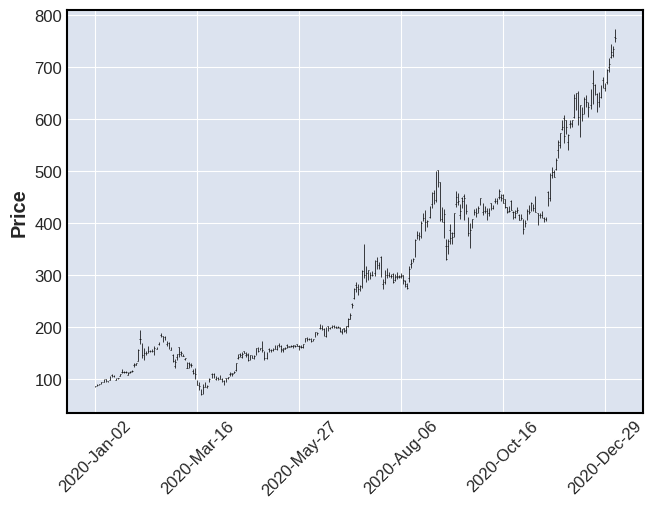

In [4]:
# Parts 1-3: Using Stock Market Data
# Here we are using Tesla (ticker = TSLA) as an example.
#df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

daily = pd.read_csv('tsla.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

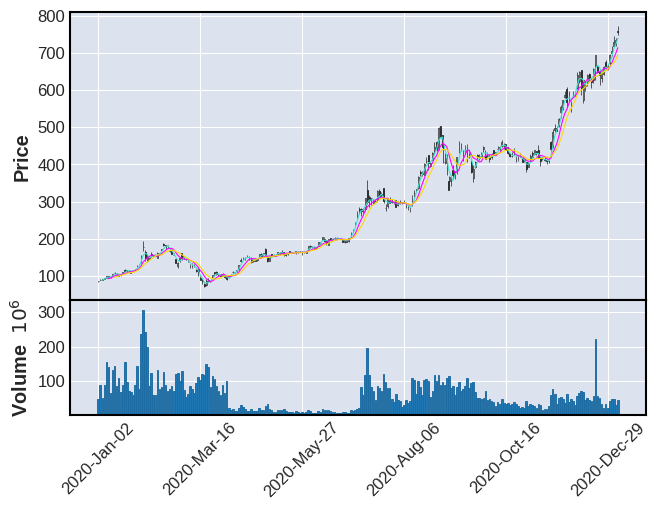

In [5]:
mpf.plot(daily, type='candle', mav = (3, 6, 9), volume = True)

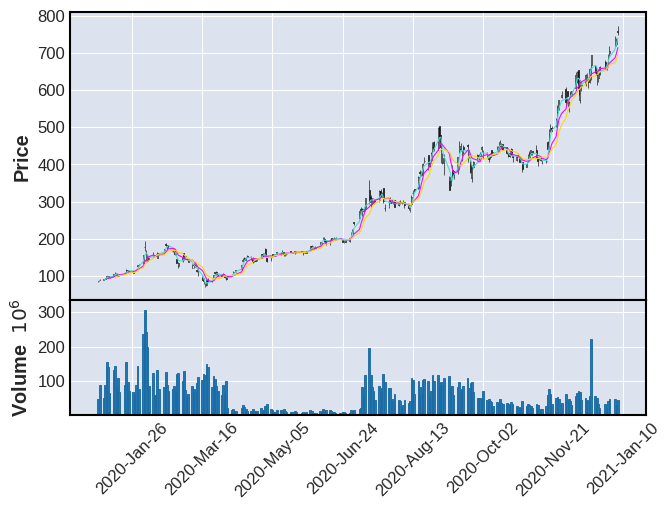

In [6]:
mpf.plot(daily, type = 'candle', mav =(3, 6, 9), volume = True, show_nontrading = True)

In [7]:
# Plot intraday data:
# intraday = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
# intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
# intraday.index.name = 'Date'
# intraday.shape
# intraday.head(3)
# intraday.tail(3)

(256, 6)

High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-02  160.729996  158.330002  158.779999  160.619995  22622100.0   
2020-01-03  159.949997  158.059998  158.320007  158.619995  21116200.0   
2020-01-06  159.100006  156.509995  157.080002  159.029999  20813700.0   

             Adj Close  
Date                    
2020-01-02  158.936279  
2020-01-03  156.957260  
2020-01-06  157.362961

High         Low        Open       Close      Volume  \
Date                                                                     
2021-01-04  223.000000  214.809998  222.529999  217.690002  37130100.0   
2021-01-05  218.520004  215.699997  217.259995  217.899994  23823000.0   
2021-01-06  216.490005  211.940002  212.169998  212.250000  35883400.0   

             Adj Close  
Date                    
2021-01-04  217.690002  
2021-01-05  217.899994  
2021-01-06  212.250000

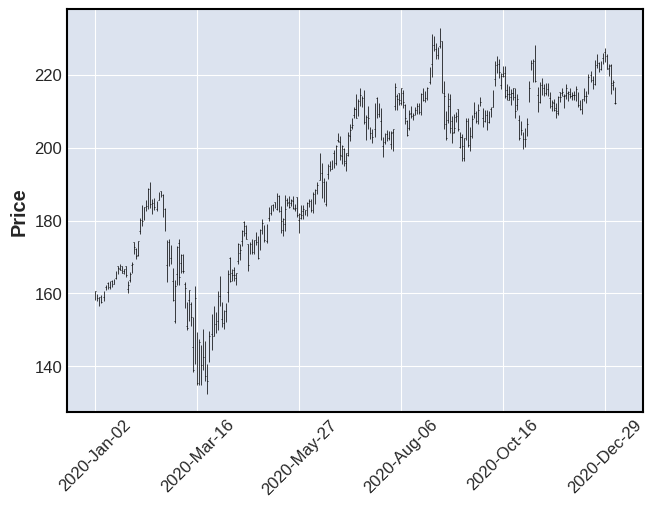

In [8]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('MSFT', 'yahoo', start, end)
df.to_csv('msft.csv')

daily = pd.read_csv('msft.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

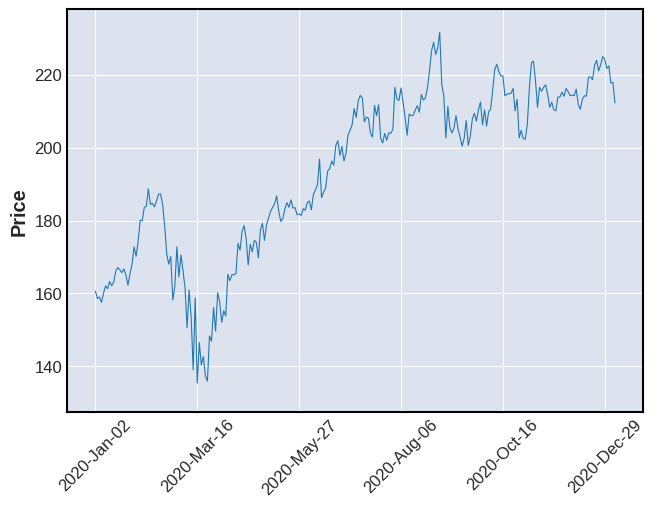

In [9]:
mpf.plot(daily, type='line')

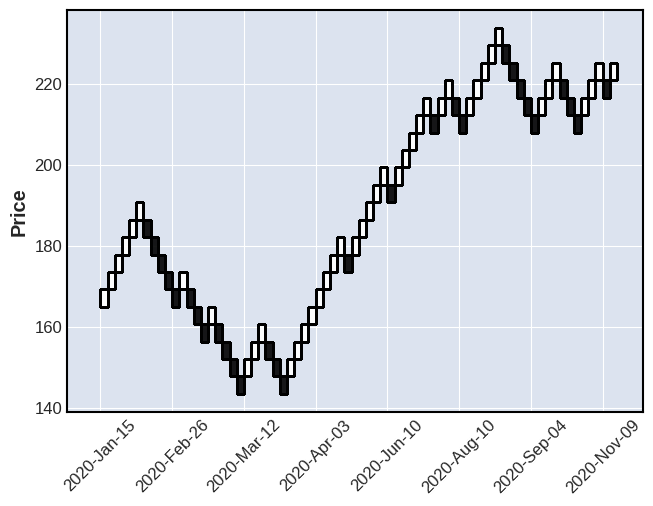

In [10]:
mpf.plot(daily, type='renko')

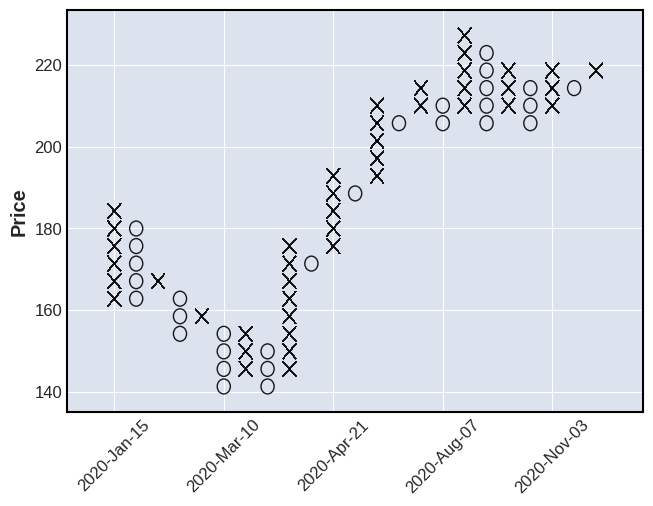

In [11]:
mpf.plot(daily, type='pnf')

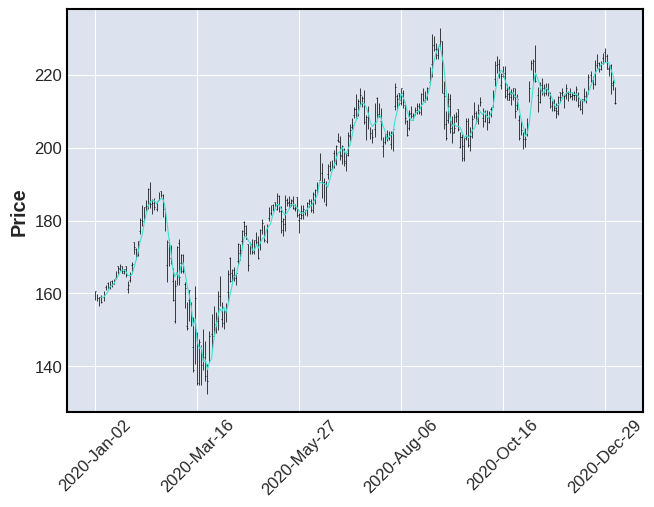

In [12]:
mpf.plot(daily, type = 'ohlc', mav=4)

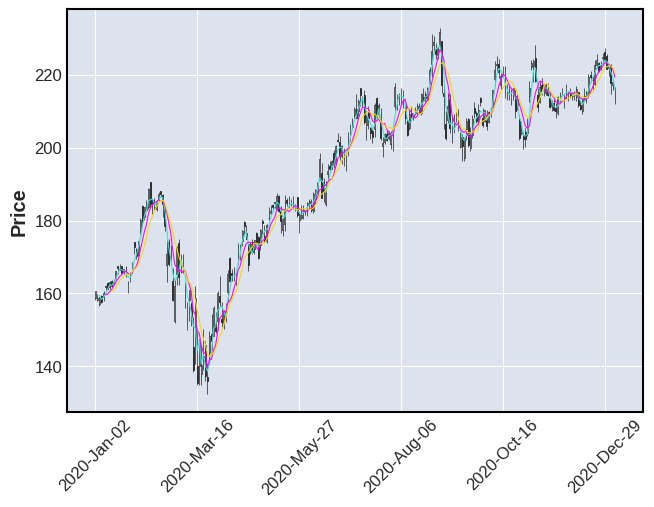

In [13]:
mpf.plot(daily, type='candle', mav=(3,6,9))

High         Low        Open       Close       Volume  \
Date                                                                      
2020-01-02   86.139999   84.342003   84.900002   86.052002   47660500.0   
2020-01-03   90.800003   87.384003   88.099998   88.601997   88892500.0   
2020-01-06   90.311996   88.000000   88.094002   90.307999   50665000.0   
2020-01-07   94.325996   90.671997   92.279999   93.811996   89410500.0   
2020-01-08   99.697998   93.646004   94.739998   98.428001  155721500.0   
...                ...         ...         ...         ...          ...   
2020-12-30  696.599976  668.359985  672.000000  694.780029   42846000.0   
2020-12-31  718.719971  691.119995  699.989990  705.669983   49570900.0   
2021-01-04  744.489990  717.190002  719.460022  729.770020   48638200.0   
2021-01-05  740.840027  719.200012  723.659973  735.109985   32245200.0   
2021-01-06  774.000000  749.099976  758.489990  755.979980   44457500.0   

             Adj Close  
Date                    
2020-01-02   86.052002  
2020-01-03   88.601997  
2020-01-06   90.307999  
2020-01-07   93.811996  
2020-01-08   98.428001  
...                ...  
2020-12-30  694.780029  
2020-12-31  705.669983  
2021-01-04  729.770020  
2021-01-05  735.109985  
2021-01-06  755.979980  

[256 rows x 6 columns]

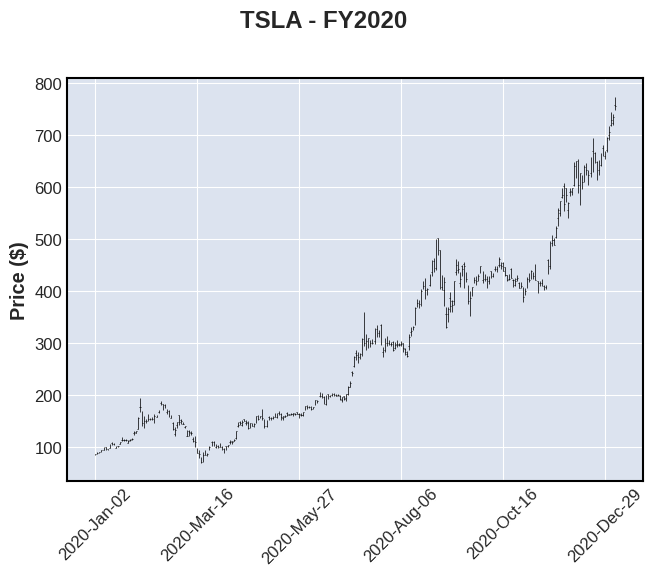

In [14]:
datafile = 'tsla.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Convert dates from string to datetime format
data.index = pd.to_datetime(data.index)
data

mpf.plot(
    data,
    title = 'TSLA - FY2020',
    ylabel = 'Price ($)')

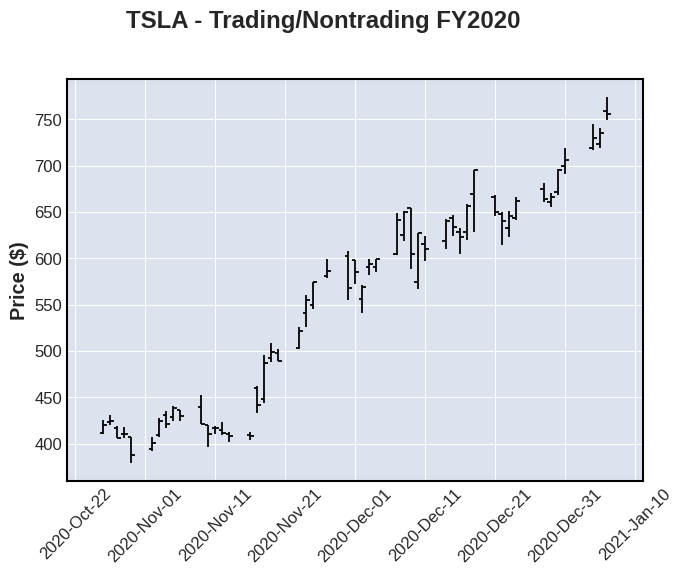

In [15]:
mpf.plot(
    data[-50:],
    title = 'TSLA - Trading/Nontrading FY2020',
    ylabel = 'Price ($)',
    show_nontrading = True)
plt.show()

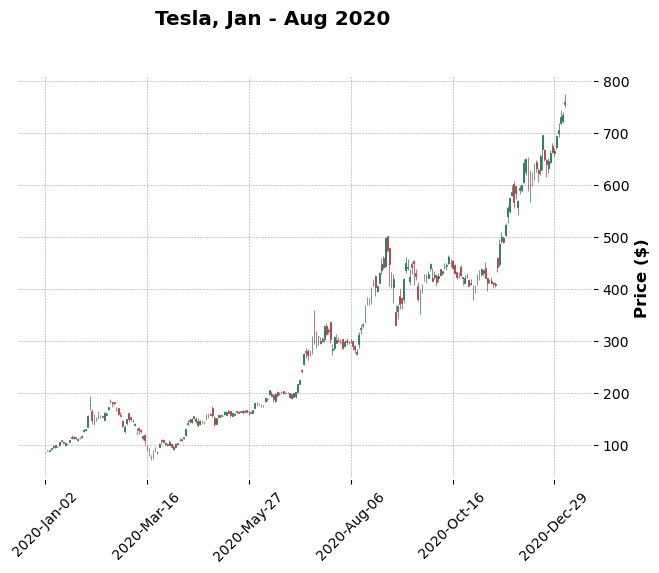

In [16]:
mpf.plot(
    data,
    #data[-50:],
    type ='candle',
    style = 'charles',
    title = 'Tesla, Jan - Aug 2020',
    ylabel = 'Price ($)',
    #show_nontrading = True
)
#    data[-50:], type='candlestick', show_nontrading = True)

In [17]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-12-30  696.599976  668.359985  672.000000  694.780029  42846000.0   
2020-12-31  718.719971  691.119995  699.989990  705.669983  49570900.0   
2021-01-04  744.489990  717.190002  719.460022  729.770020  48638200.0   
2021-01-05  740.840027  719.200012  723.659973  735.109985  32245200.0   
2021-01-06  774.000000  749.099976  758.489990  755.979980  44457500.0   

             Adj Close       100ma  
Date                                
2020-12-30  694.780029  468.239920  
2020-12-31  705.669983  472.459480  
2021-01-04  729.770020  477.008401  
2021-01-05  735.109985  481.249980  
2021-01-06  755.979980  485.567780  


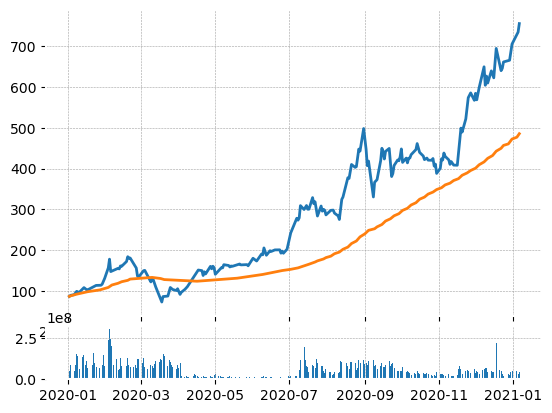

In [18]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show();

In [19]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

        Date        open        high         low       close
0 2020-01-02   86.052002   98.428001   86.052002   95.629997
1 2020-01-12  104.972000  109.440002  102.099998  109.440002
2 2020-01-22  113.912003  130.113998  111.603996  130.113998
3 2020-02-01  156.000000  177.412003  146.940002  154.255997
4 2020-02-11  154.876007  183.483994  153.457993  179.882004


In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date        open        high         low       close
0  737426.0   86.052002   98.428001   86.052002   95.629997
1  737436.0  104.972000  109.440002  102.099998  109.440002
2  737446.0  113.912003  130.113998  111.603996  130.113998
3  737456.0  156.000000  177.412003  146.940002  154.255997
4  737466.0  154.876007  183.483994  153.457993  179.882004


In [21]:
df_ohlc.head()

Date        open        high         low       close
0  737426.0   86.052002   98.428001   86.052002   95.629997
1  737436.0  104.972000  109.440002  102.099998  109.440002
2  737446.0  113.912003  130.113998  111.603996  130.113998
3  737456.0  156.000000  177.412003  146.940002  154.255997
4  737466.0  154.876007  183.483994  153.457993  179.882004

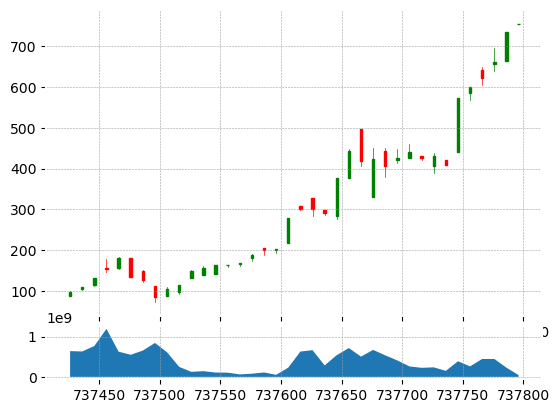

In [25]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

#mplfinance.plot(ax1, df_ohlc.values, width = 2, colorup = 'g')
# only takes one positional argument??
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show();

In [26]:
# Part 4: Resampling
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head());

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-12-22  649.880005  614.229980  648.000000  640.340027  51716000.0   
2020-12-23  651.500000  622.570007  632.200012  645.979980  33173000.0   
2020-12-24  666.090027  641.000000  642.989990  661.770020  22865600.0   
2020-12-28  681.400024  660.799988  674.510010  663.690002  32278600.0   
2020-12-29  669.900024  655.000000  661.000000  665.989990  22910800.0   
2020-12-30  696.599976  668.359985  672.000000  694.780029  42846000.0   
2020-12-31  718.719971  691.119995  699.989990  705.669983  49570900.0   
2021-01-04  744.489990  717.190002  719.460022  729.770020  48638200.0   
2021-01-05  740.840027  719.200012  723.659973  735.109985  32245200.0   
2021-01-06  774.000000  749.099976  758.489990  755.979980  44457500.0   

             Adj Close       100ma  
Date                                
2020-12-22  640.340027  449.716440  


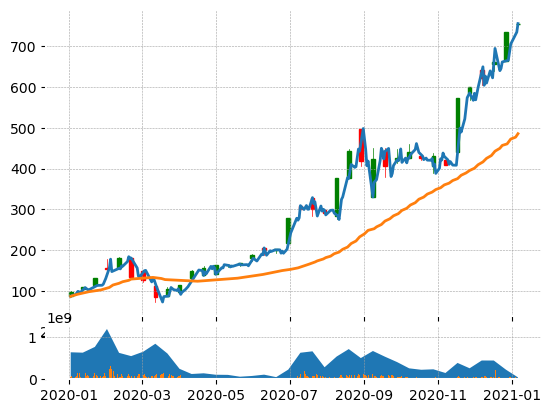

In [27]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show();

In [28]:
# Part 5: Getting S&P500 List
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL'

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP

In [29]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,5,28)

    # Grab all ticker data
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have ADP
Already have AZO
Already have AV

In [77]:
# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: /
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learnings: Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

In [79]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [81]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# clf = neighbors.KNeighborsClassifier()
#
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))
#
# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

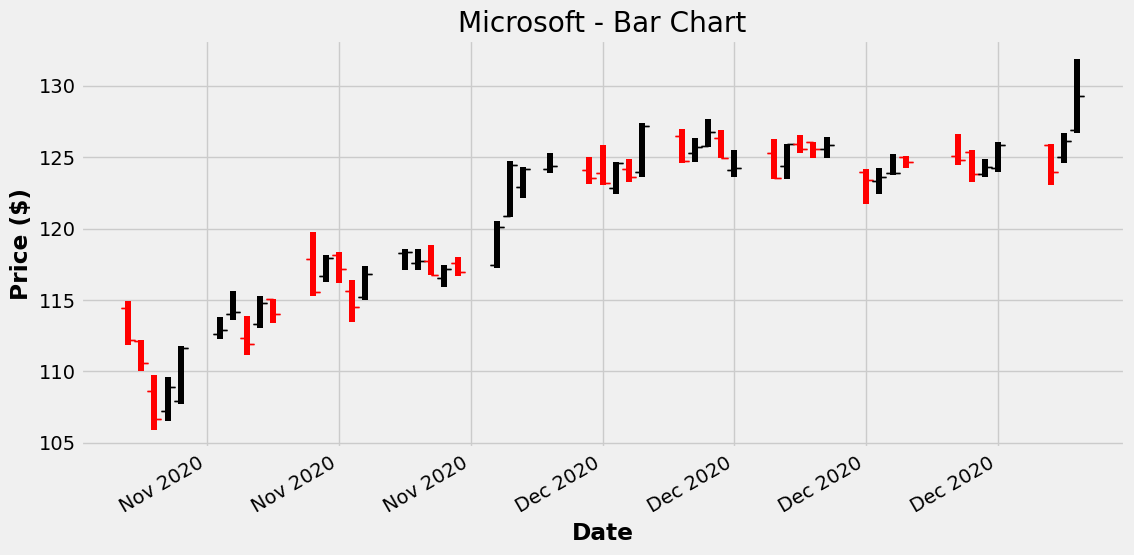

In [84]:
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

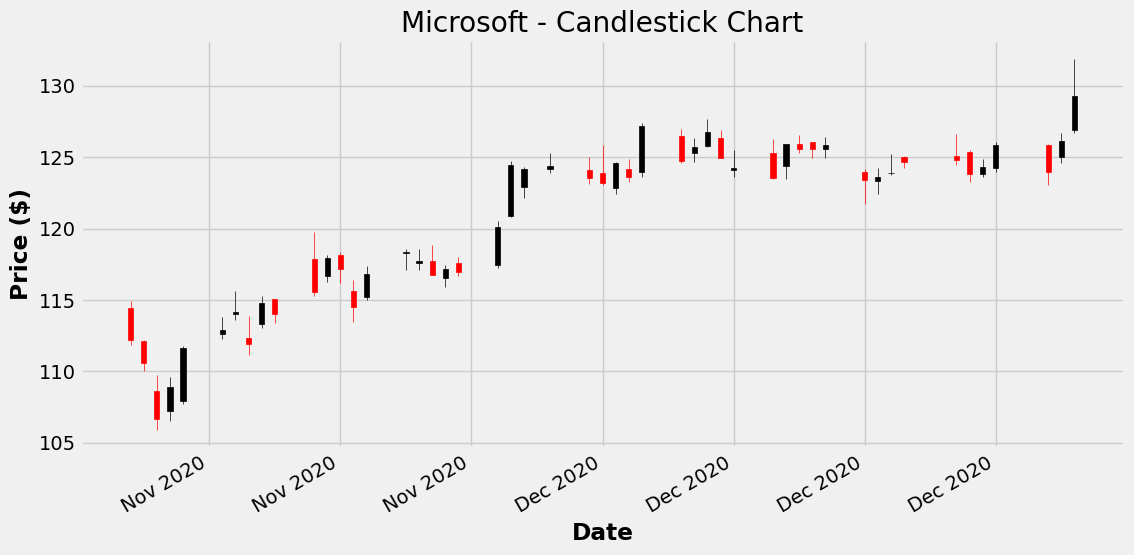

In [85]:
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

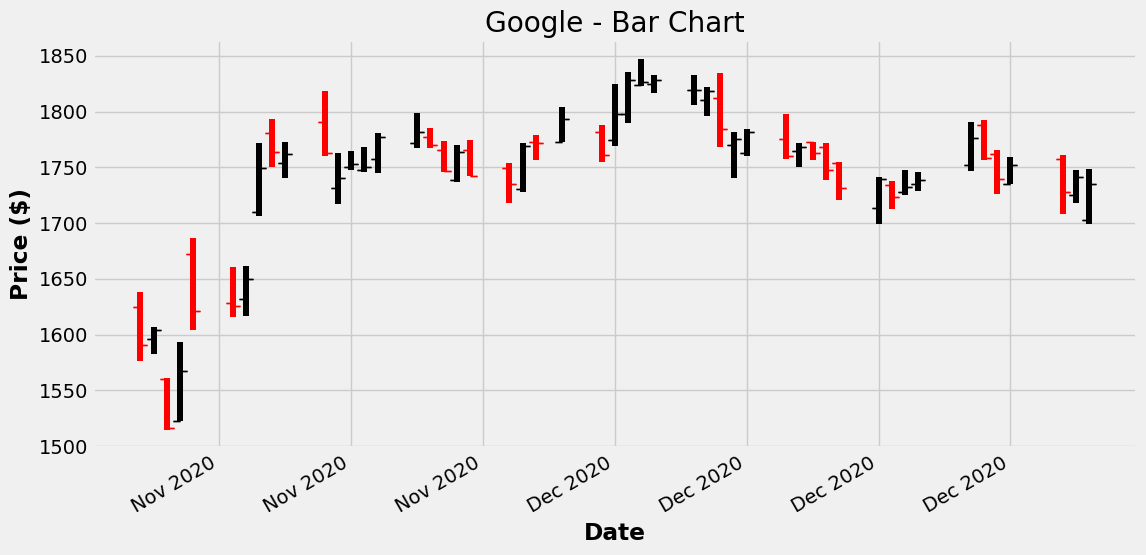

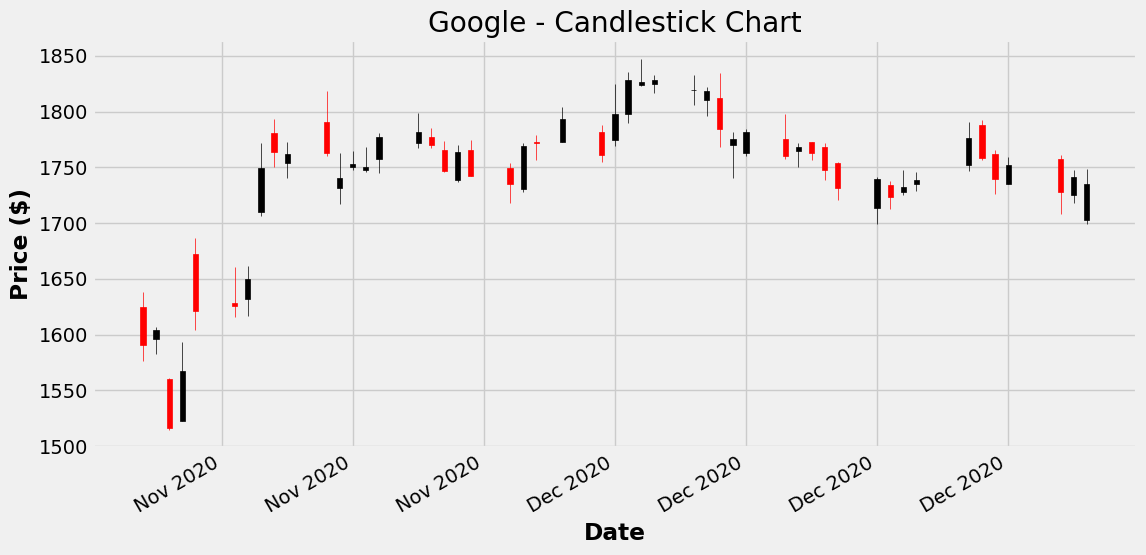

In [111]:
# Loading data into dataframe for Google (ticker = GOOG):
df = web.DataReader('GOOG', 'yahoo', start, end)
df.to_csv('goog.csv')
df = pd.read_csv('goog.csv', parse_dates = True, index_col = 'Date')

datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show();
# add this if you're not using Jupyter Notebook

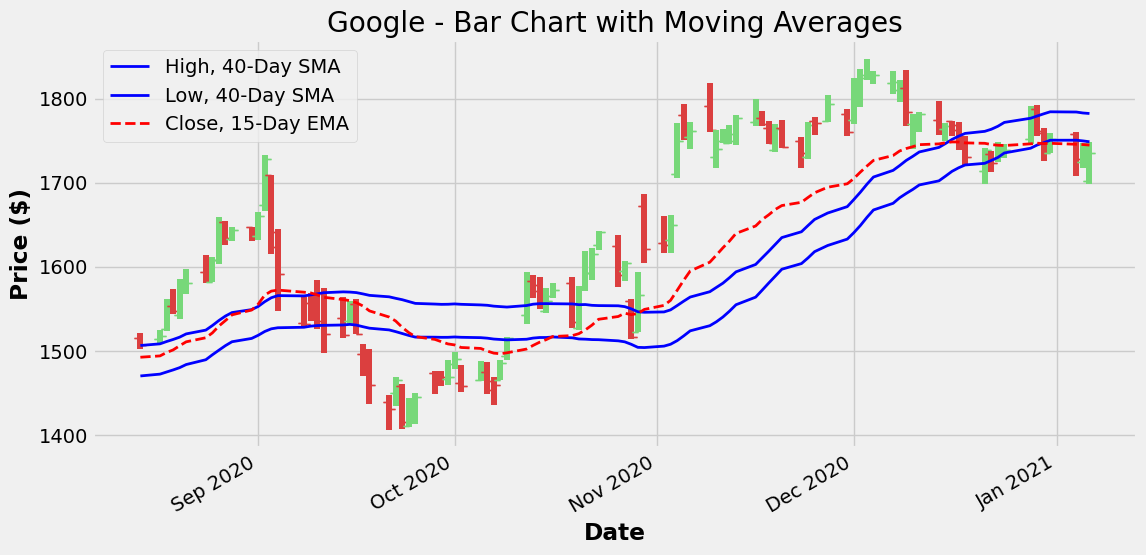

In [112]:
# Loading data into dataframe for Google (ticker = GOOG):
datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook


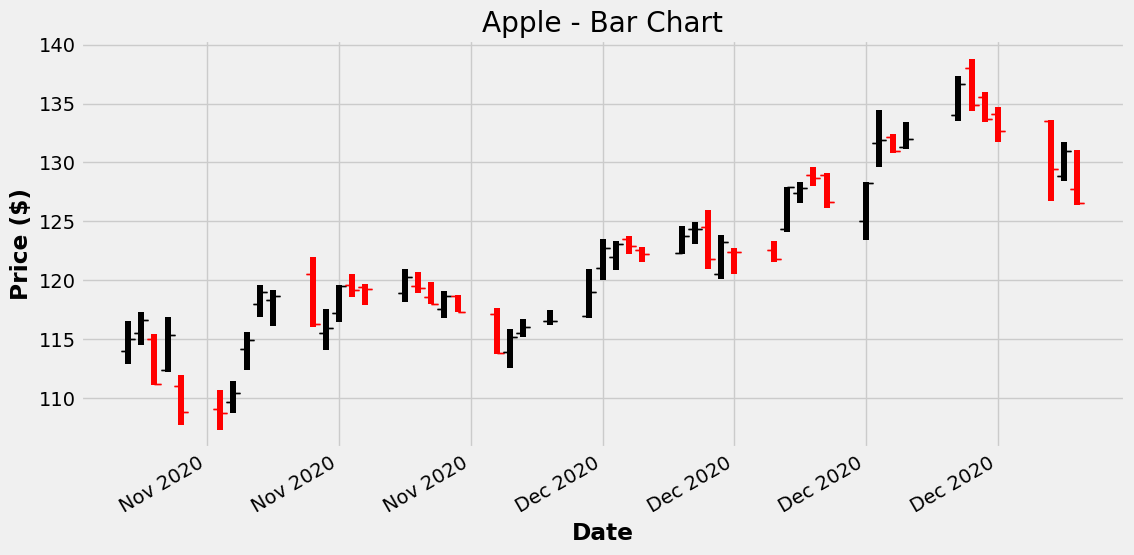

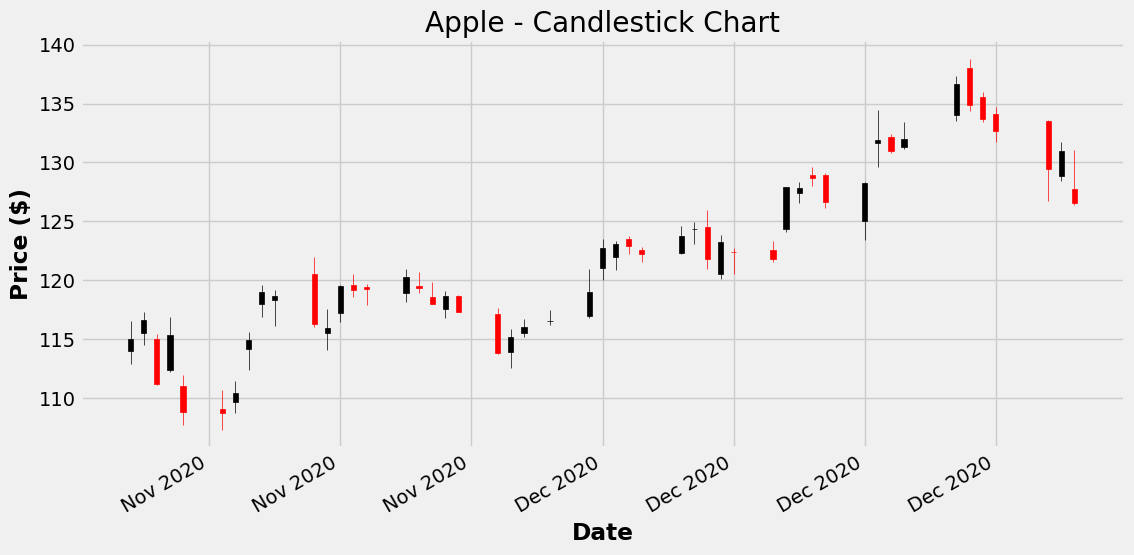

In [113]:
# Loading data into dataframe for Apple (ticker = AAPL):
df = web.DataReader('AAPL', 'yahoo', start, end)
df.to_csv('aapl.csv')
df = pd.read_csv('aapl.csv', parse_dates = True, index_col = 'Date')

datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); 
# add this if you're not using Jupyter Notebook

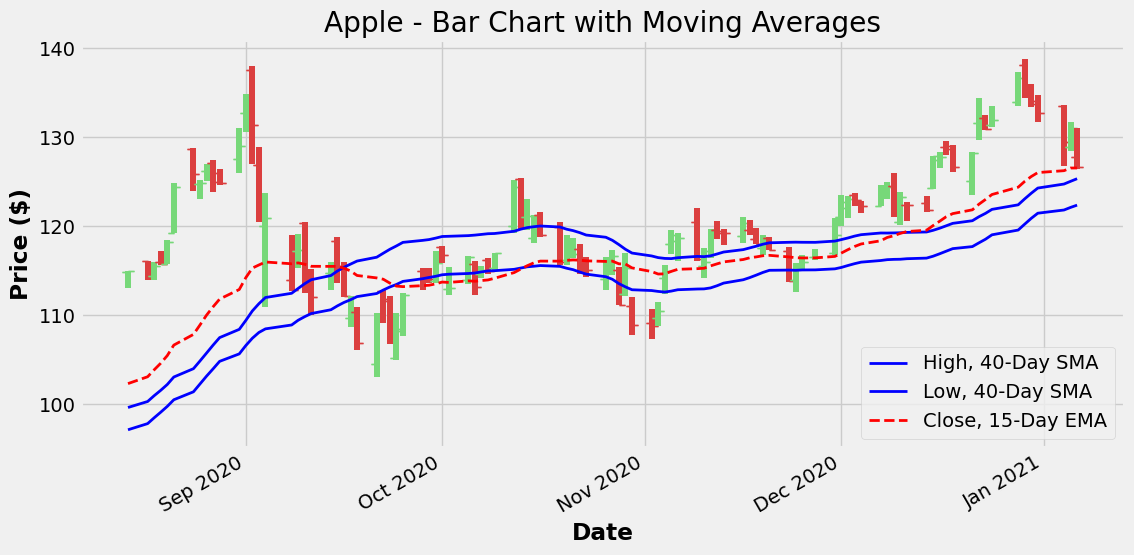

In [114]:
# Loading data into dataframe for Apple (ticker = AAPL):
datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook


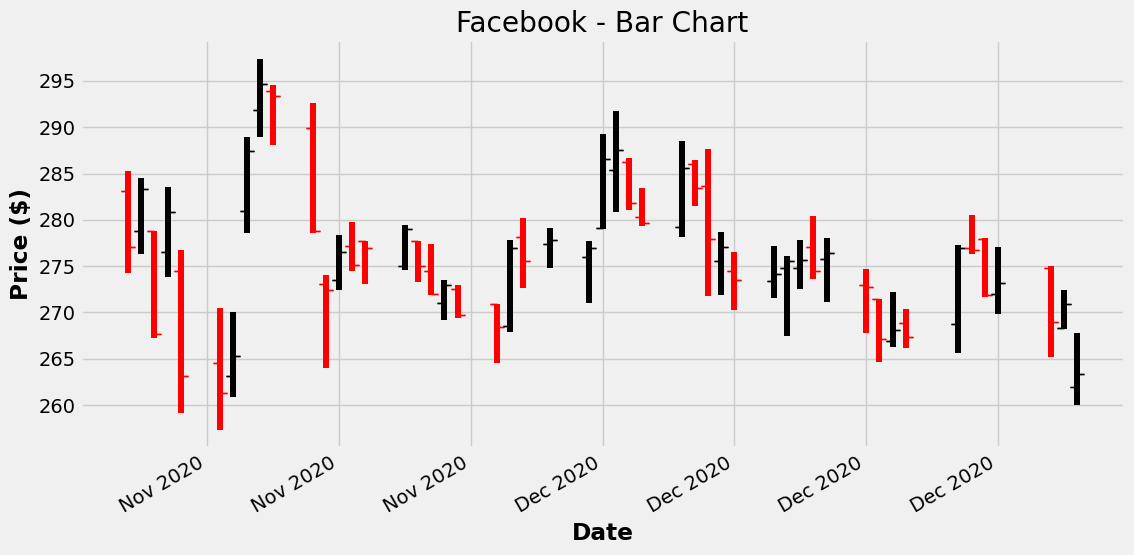

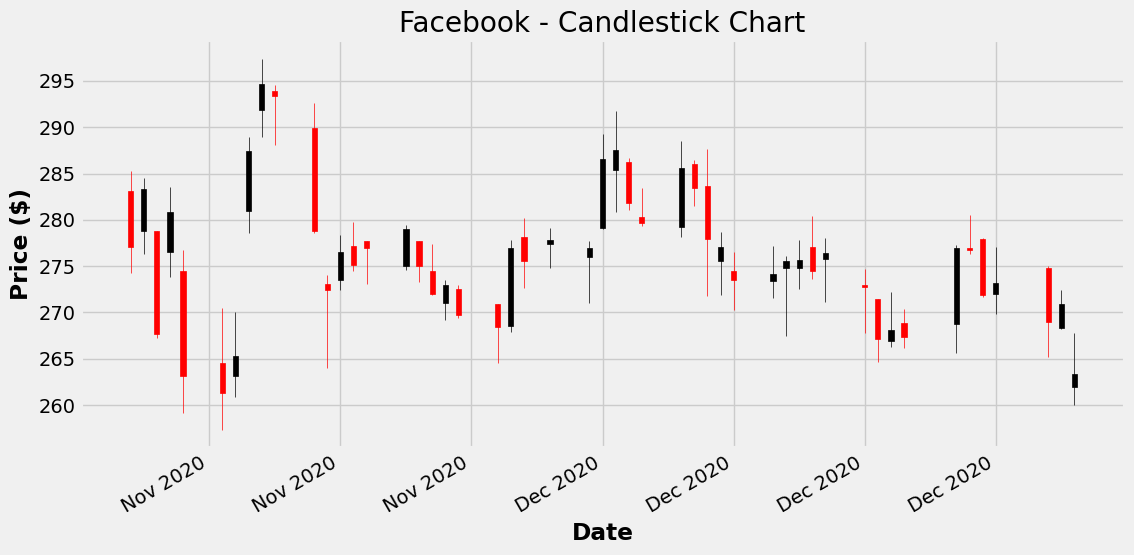

In [115]:
# Loading data into dataframe for Facebook (ticker = FB):
df = web.DataReader('FB', 'yahoo', start, end)
df.to_csv('fb.csv')
df = pd.read_csv('fb.csv', parse_dates = True, index_col = 'Date')

datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

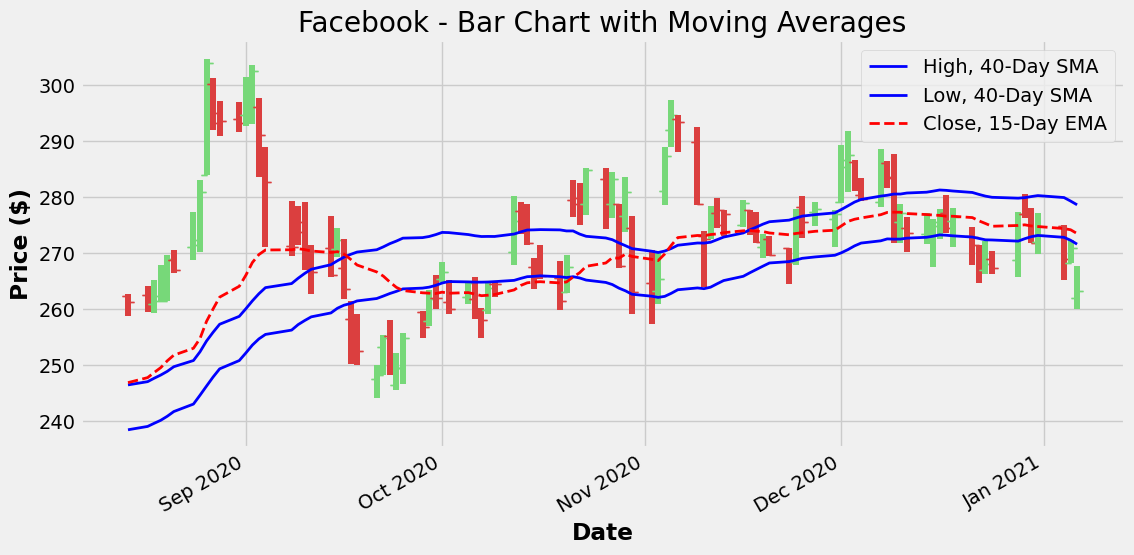

In [116]:
# Loading data into dataframe for Facebook (ticker = FB):
datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

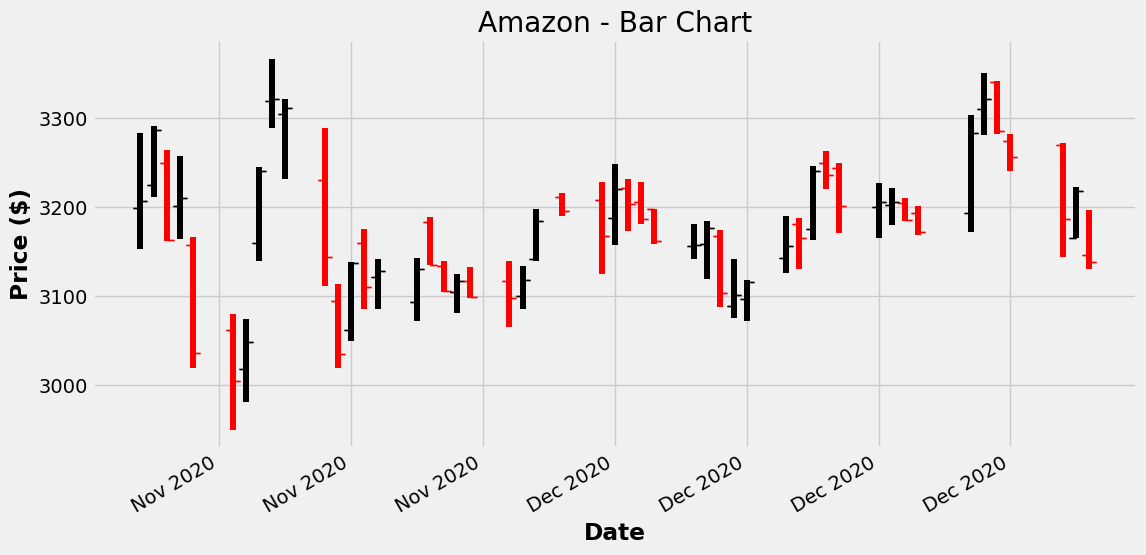

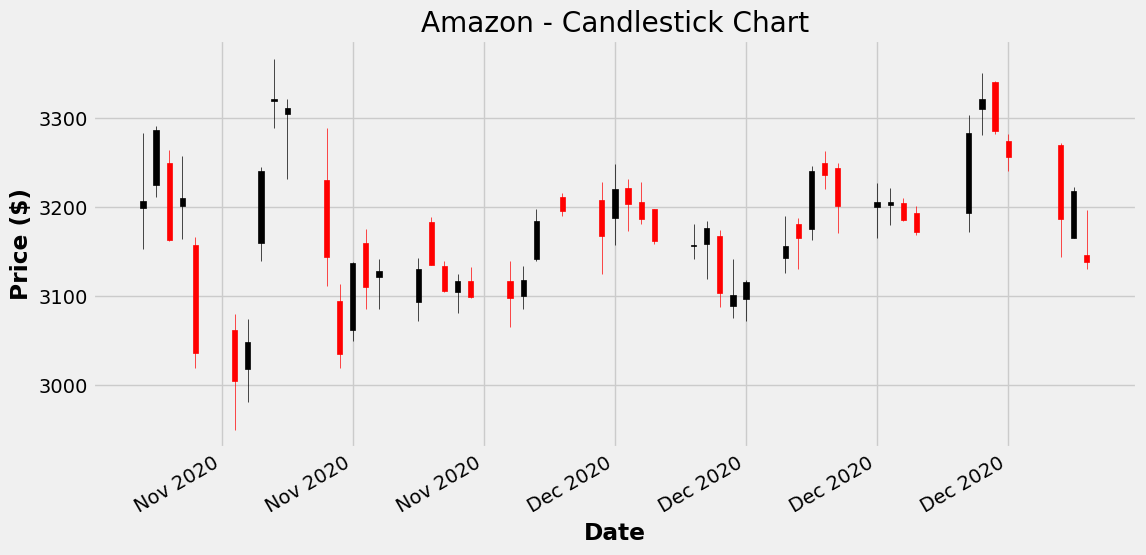

In [117]:
# Loading data into dataframe for Amazon (ticker = AMZN):
df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('amzn.csv')
df = pd.read_csv('amzn.csv', parse_dates = True, index_col = 'Date')

datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook

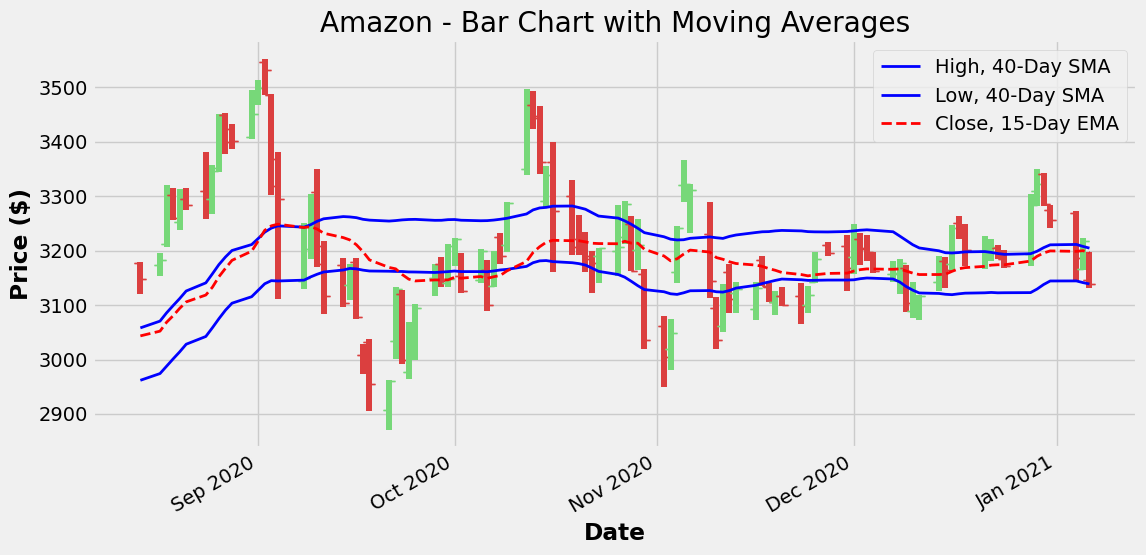

In [118]:
# Loading data into dataframe:
datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook


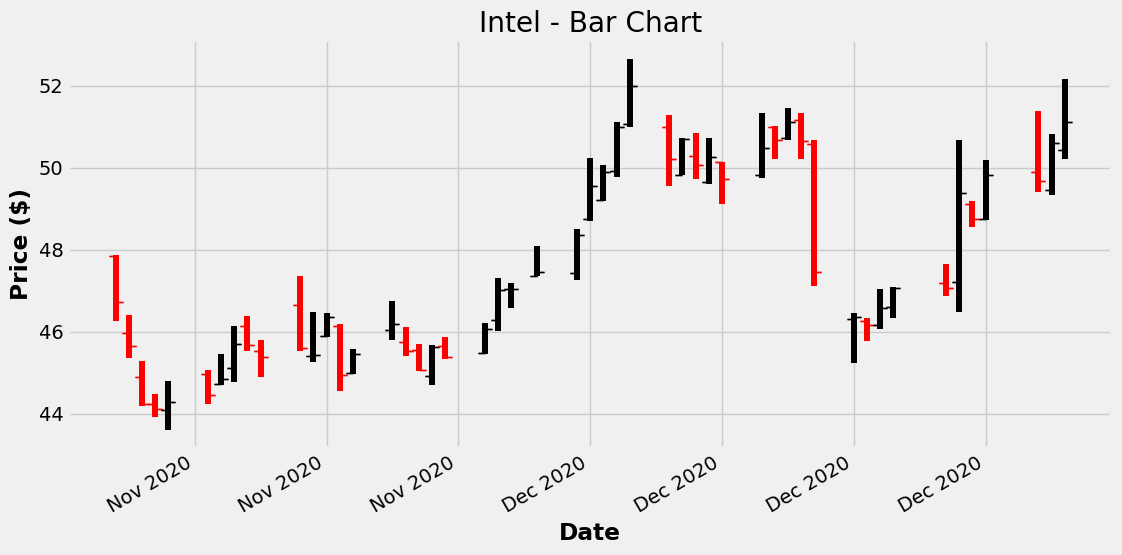

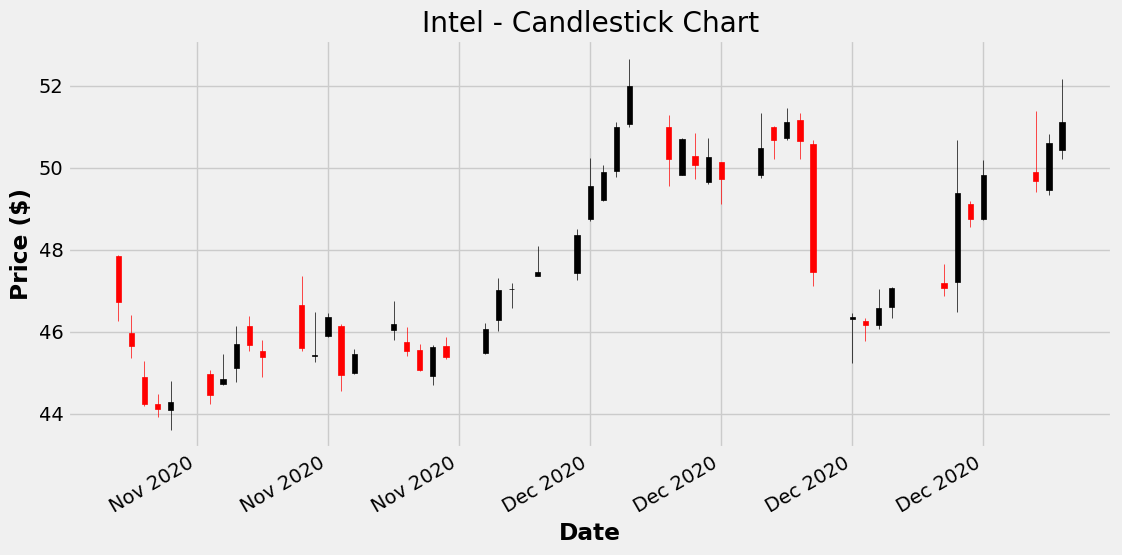

In [119]:
# Loading data into dataframe for Intel (ticker = INTC):
df = web.DataReader('INTC', 'yahoo', start, end)
df.to_csv('intc.csv')
df = pd.read_csv('intc.csv', parse_dates = True, index_col = 'Date')

datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook

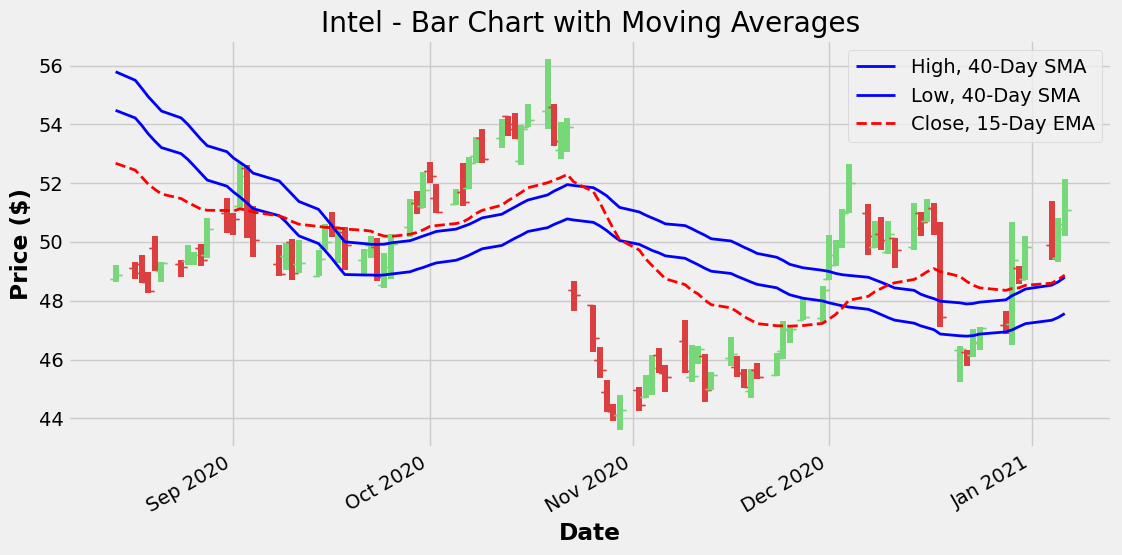

In [120]:
# Loading data into dataframe:
datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook

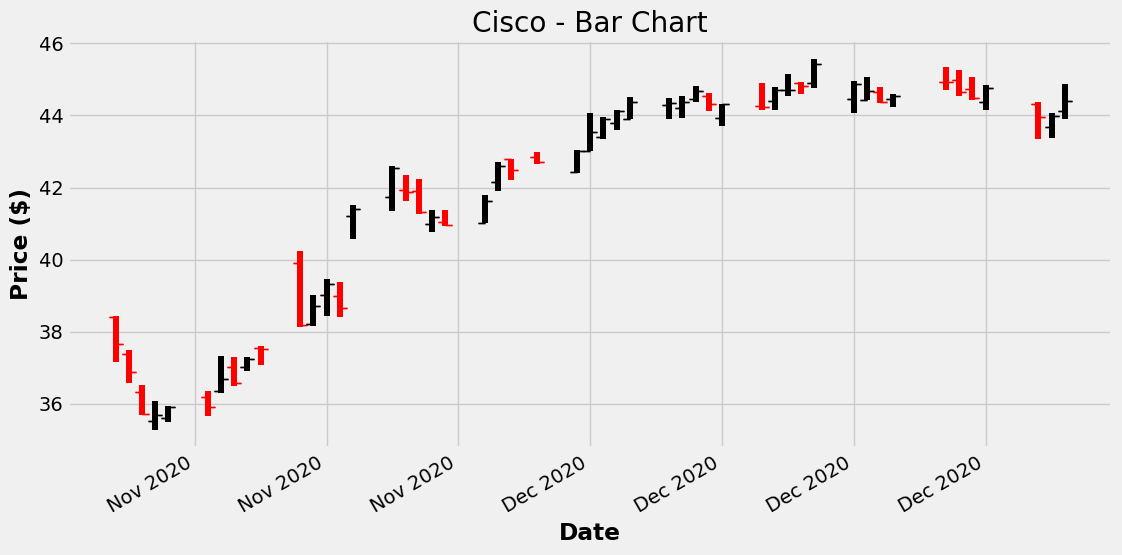

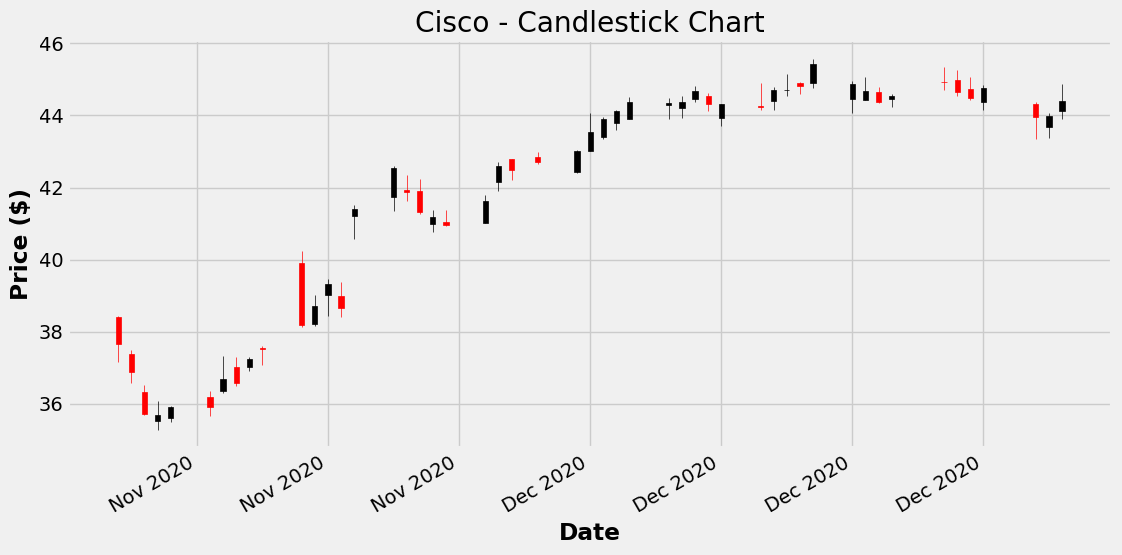

In [121]:
# Loading data into dataframe for Cisco (ticker = CSCO):
df = web.DataReader('CSCO', 'yahoo', start, end)
df.to_csv('csco.csv')
df = pd.read_csv('csco.csv', parse_dates = True, index_col = 'Date')

datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook

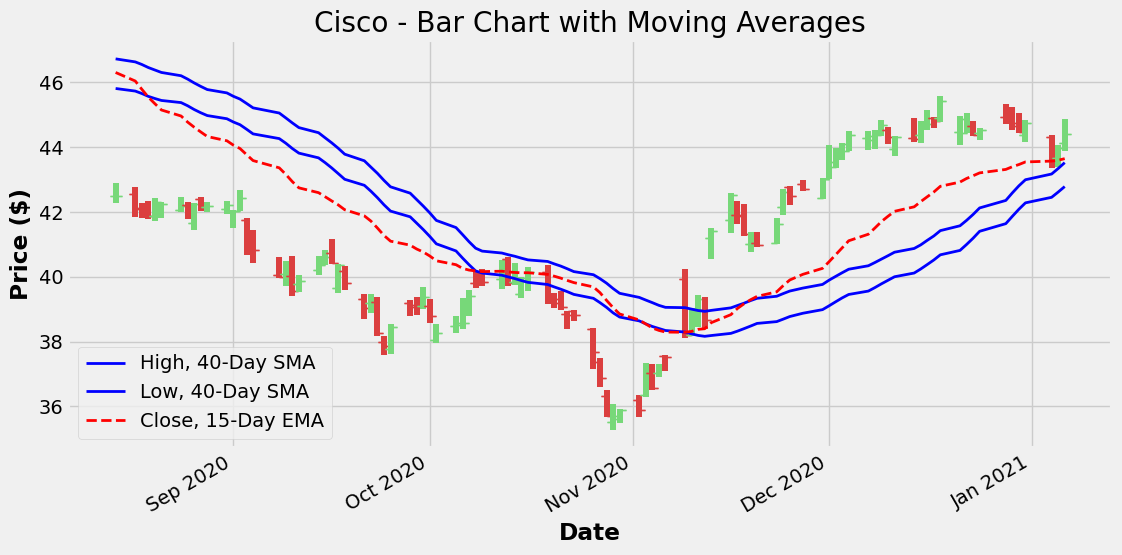

In [122]:
# Loading data into dataframe - Cisco (CSCO):
datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show();
 # add this if you're not using Jupyter Notebook


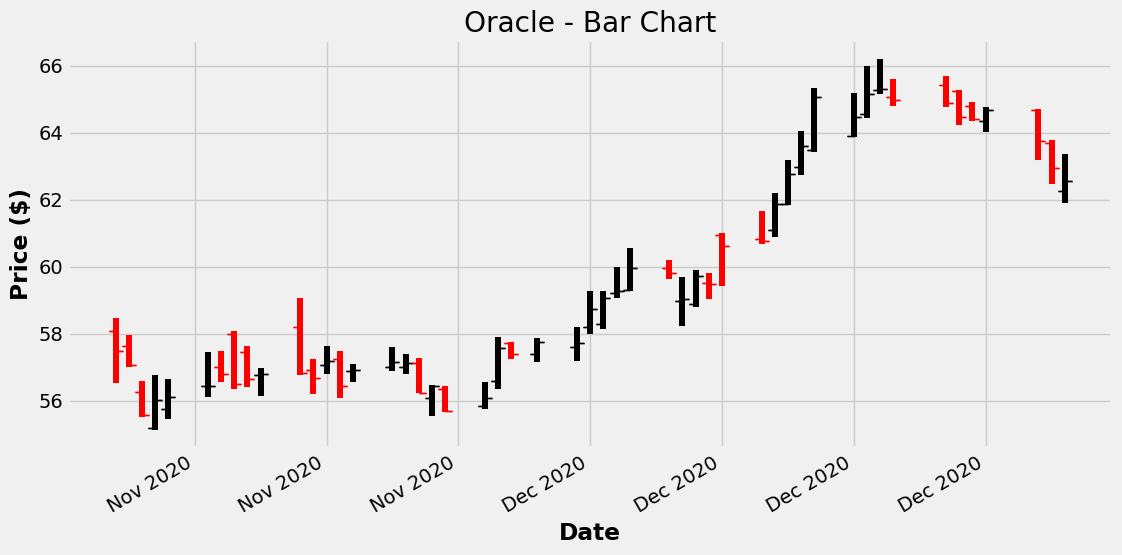

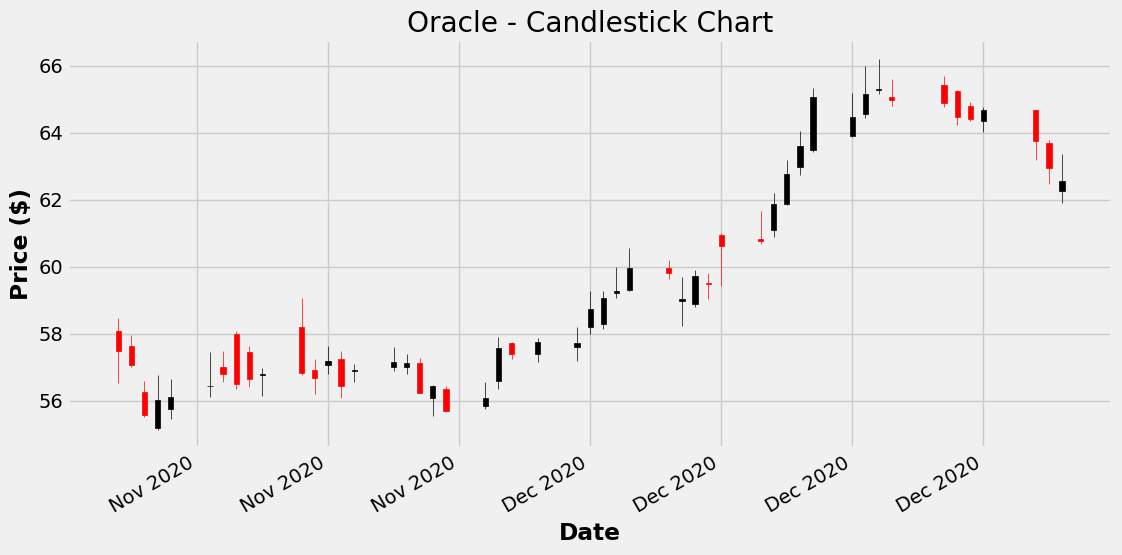

In [123]:
# Loading data into dataframe for Oracle (ticker = ORCL):
df = web.DataReader('ORCL', 'yahoo', start, end)
df.to_csv('orcl.csv')
df = pd.read_csv('orcl.csv', parse_dates = True, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

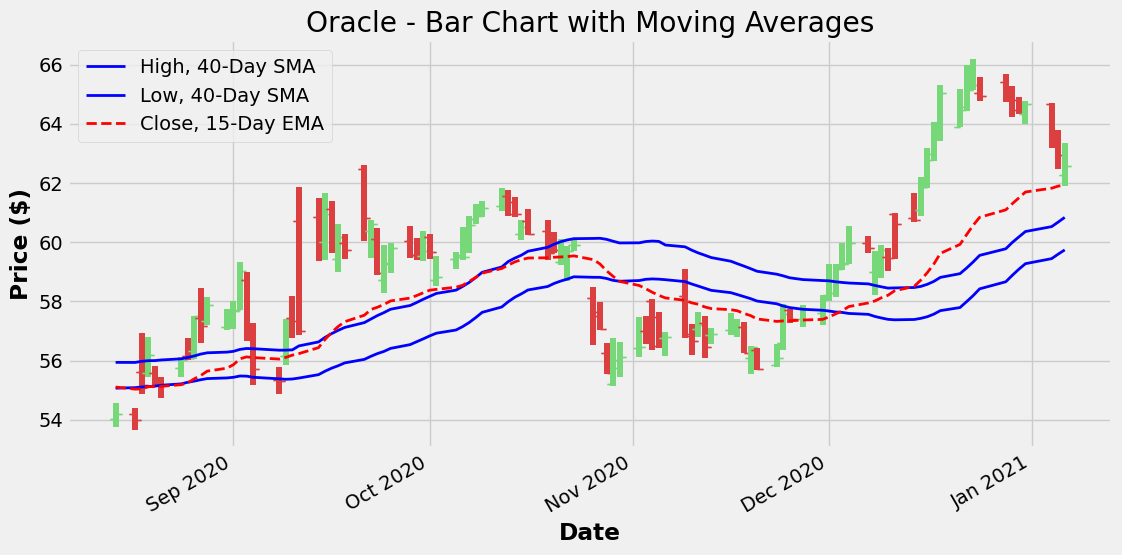

In [124]:
# Loading data into dataframe for Oracle (ticker = ORCL):
datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

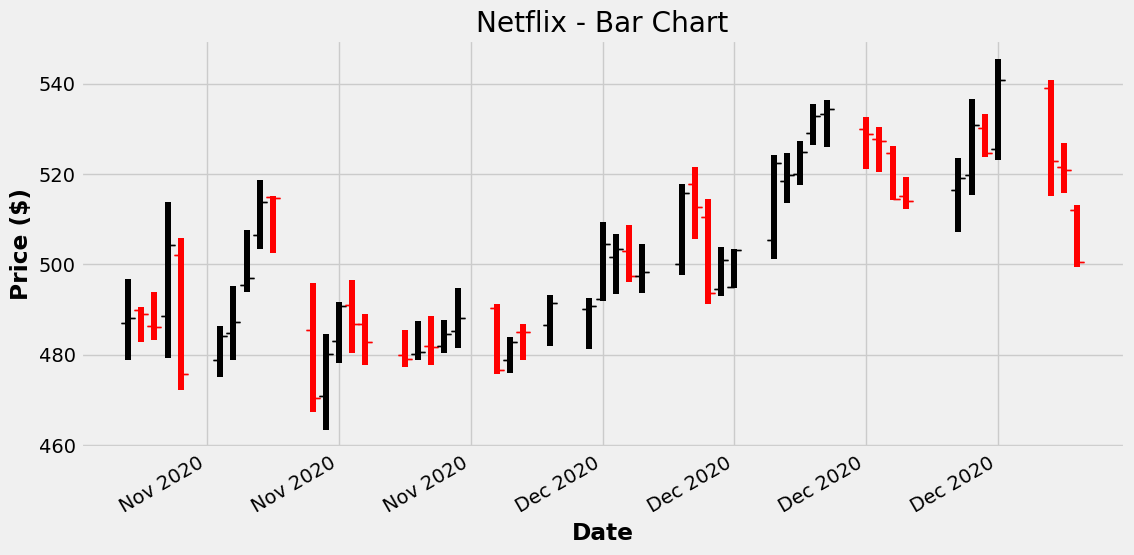

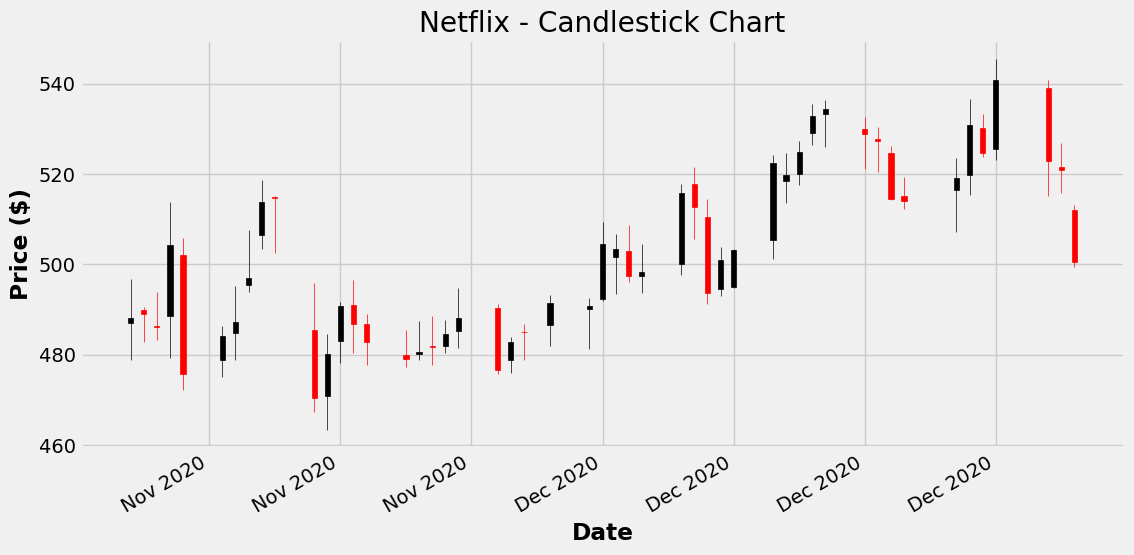

In [125]:
# Loading data into dataframe for Netflix (ticker = NFLX):
df = web.DataReader('NFLX', 'yahoo', start, end)
df.to_csv('nflx.csv')
df = pd.read_csv('nflx.csv', parse_dates = True, index_col = 'Date')

datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

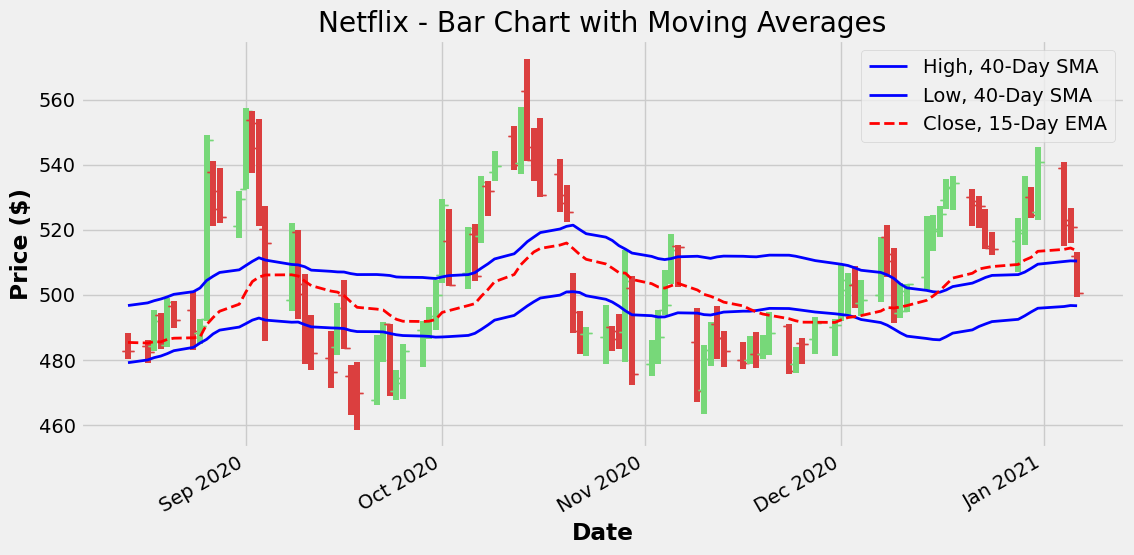

In [126]:
# Loading data into dataframe for Netflix (ticker = NFLX):
datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook


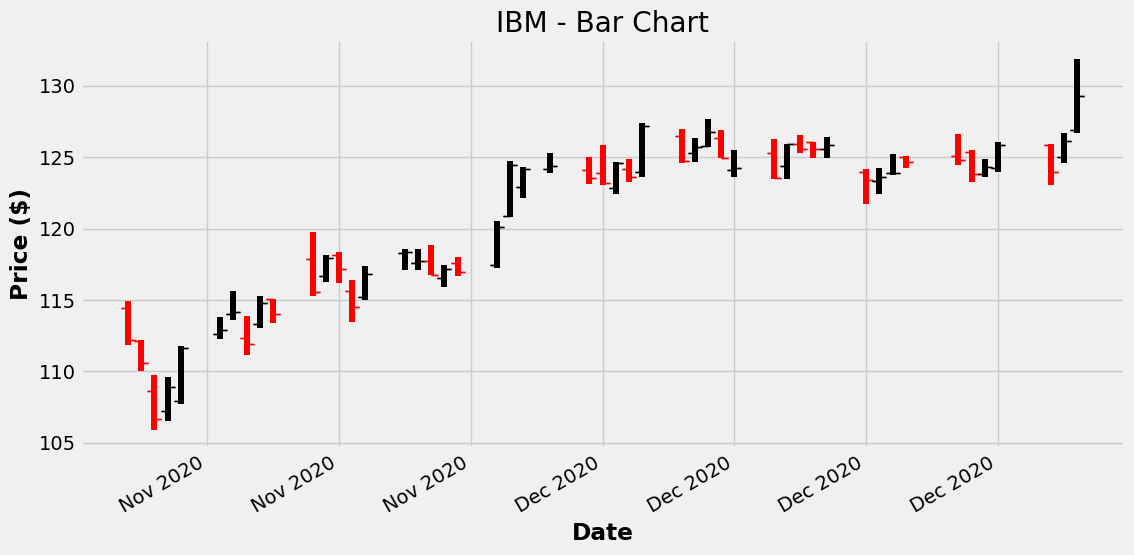

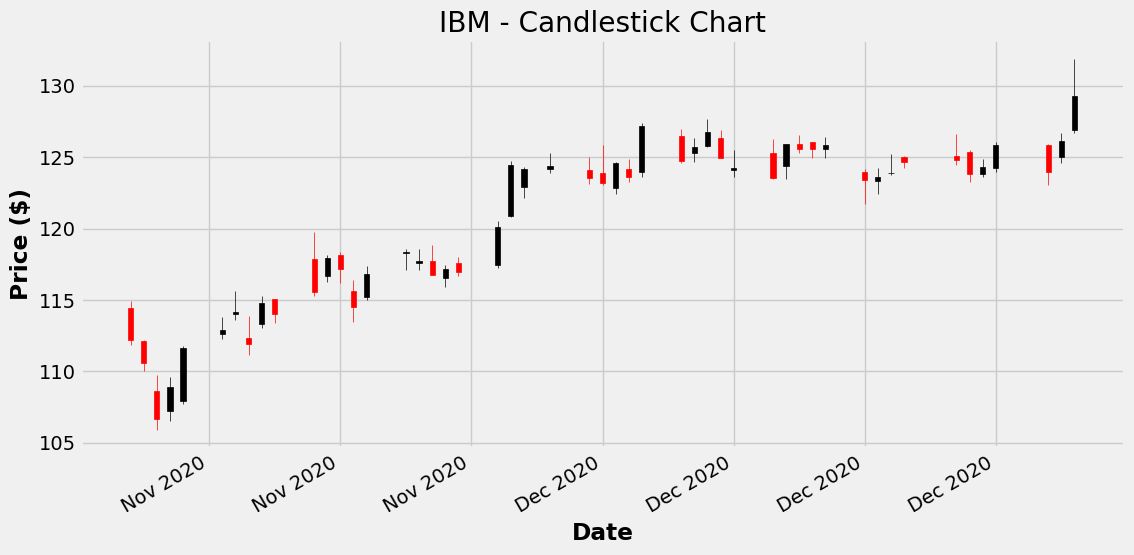

In [127]:
# Loading data into dataframe for IBM (ticker = IBM):
df = web.DataReader('IBM', 'yahoo', start, end)
df.to_csv('ibm.csv')
df = pd.read_csv('ibm.csv', parse_dates = True, index_col = 'Date')

datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook

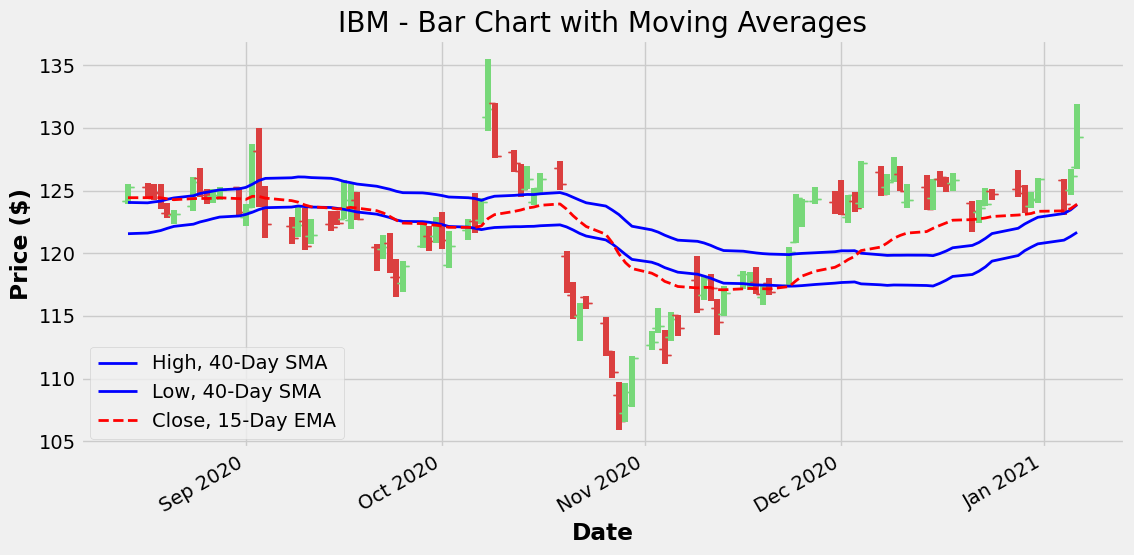

In [128]:
# Loading data into dataframe for IBM (ticker = IBM):
datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show(); # add this if you're not using Jupyter Notebook


In [129]:
# Two simple moving averages (in blue) create channel:
# Compared to single moving average, 
# there is a gray zone when prices are neither above nor below the channel.
# One exmaple, would be to adopt trading rules such as:
# (1) Enter long positions (BUY) only when price bars completely above higher 40-Day SMA.
# (2) Enter short positions (SELL) only when price bars completely below lower 40-Day SMA.
# (3) Do not enter position (HOLD) - Keep flat on the market when prices between two 40-Day SMAs, 
# or last bar crossing either 40-Day SMA.

# Another example of trading strategy rules could include:
# (1) Enter long positions (BUY) only when 15-Day EMA > the higher 40-Day SMA.
# (2) Enter short positions (SELL) only when 15-Day EMA < the lower 40-Day SMA.
# (3) If else, stay flat (HOLD), for example, when 15-Day EMA is inside the channel created by two SMAs.

# Now, we can ask whether such trading rules could be used to build a profitable trading system. 
# Will such trading strategy rules help generate profits instead of lossess, and
# how to select best set of rules. 

# Next, backtest trading system to calculate P&L based on historical data.

In [130]:
# Another element for this project, or perhaps a separate project would include fundamental analysis
# Analyzing Financial Statements for Insight into Company's Valuation for Possible Investment
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MFT.NZ'
url = 'https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT'

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above

page = requests.get(url, headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want

tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element

tree.xpath("//h1/text()")

['Microsoft Corporation (MSFT)']

In [131]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.

assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0            1            2  \
0                                 Breakdown    6/30/2020    6/30/2019   
1                              Total Assets  301,311,000  286,556,000   
2   Total Liabilities Net Minority Interest  183,007,000  184,226,000   
3      Total Equity Gross Minority Interest  118,304,000  102,330,000   
4                      Total Capitalization  177,882,000  168,992,000   
5                       Common Stock Equity  118,304,000  102,330,000   
6                 Capital Lease Obligations    7,671,000    6,188,000   
7                       Net Tangible Assets   67,915,000   52,554,000   
8                           Working Capital  109,605,000  106,132,000   
9                          Invested Capital  181,631,000  174,508,000   
10                      Tangible Book Value   67,915,000   52,554,000   
11                               Total Debt   70,998,000   78,366,000   
12                                 Net Debt   49,751,000   60,822,000   
13                             Share Issued    7,571,000    7,643,000   
14                   Ordinary Shares Number    7,571,000    7,643,000   

              3            4  
0     6/30/2018    6/30/2017  
1   258,848,000  241,086,000  
2   176,130,000  168,692,000  
3    82,718,000   72,394,000  
4   154,960,000  148,467,000  
5    82,718,000   72,394,000  
6     5,568,000          NaN  
7    38,982,000   27,166,000  
8   111,174,000   95,324,000  
9   158,958,000  158,588,000  
10   38,982,000   27,166,000  
11   81,808,000   86,194,000  
12   64,294,000   78,531,000  
13    7,677,000    7,708,000  
14    7,677,000    7,708,000